In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('F:/DATA SCIENCE/[Skillbox] Профессия‌ ‌Data‌ ‌Scientist‌ (2020)/1 Data Scientist. ML. Начальный уровень/03/non_linear.csv')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
X = data['x_train'].values.reshape(-1, 1) # Превращаем Х из простого массива в вектор-столбец
y = data['y_train'].values
# разбиваем на трэйн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 10)
data.head()


,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


In [32]:
sgd_regressor = SGDRegressor(learning_rate = 'constant', eta0 = 0.01, fit_intercept = True, random_state = 42)
w_current, epsilon = np.random.random(2), 0.001
weight_evolution = []
rmse_evolution = []
w_current

array([0.98605612, 0.99463644])

Итерация остановоены на шаге 110


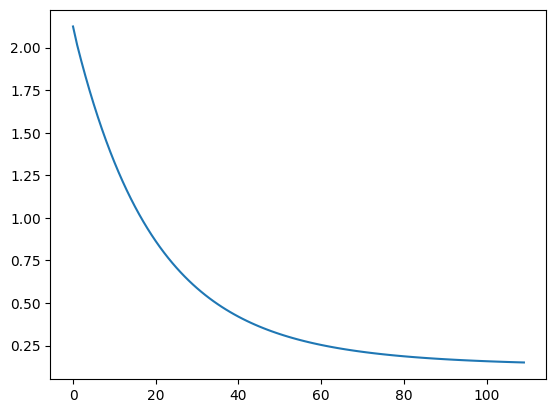

In [33]:
for step in range(800):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(
    distance.euclidean(w_current, sgd_regressor.coef_)
    )
    if weight_evolution[-1] < epsilon:
        print("Итерация остановоены на шаге %d" % step); break
    rmse_evolution.append(
        mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
    )
    w_current = sgd_regressor.coef_.copy()
plt.plot(range(step), rmse_evolution)

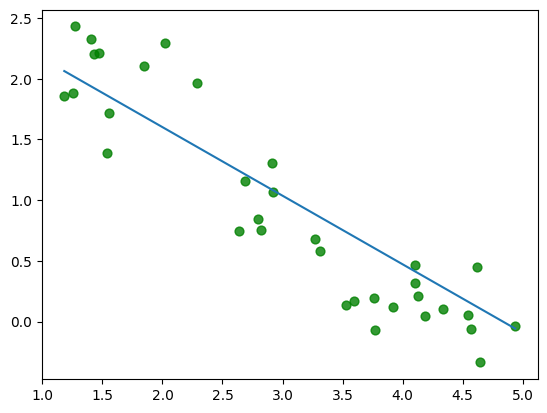

In [34]:
x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num = 100)
y_linspace = sgd_regressor.predict(x_linspace.reshape(-1, 1))
plt.plot(x_linspace, y_linspace)
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha = 0.8, label = 'data')
plt.show()